In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [2]:
# MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

# Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

# Desafio 3: Criar uma função para plotar o boxplot do seaborn

# Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

# Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

# DEsafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

# Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

# MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos


In [ ]:
#Esse fica para depois

# Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

In [3]:
alunos_menor_idade = dados.query("NU_IDADE < 18")[["SG_UF_RESIDENCIA", "NU_IDADE"]].sort_values("NU_IDADE").reset_index()
alunos_menor_idade


,index,SG_UF_RESIDENCIA,NU_IDADE
0,95630,MT,13
1,98197,AP,13
2,116501,BA,13
3,57359,SP,13
4,97869,PR,14
...,...,...,...
31235,49470,GO,17
31236,49467,GO,17
31237,49458,GO,17
31238,48853,PE,17


In [4]:
#agrupo todas as idade por estado(menores de idade) e separo a contagem de cada idade por estado
alunos_estado = alunos_menor_idade.groupby(["SG_UF_RESIDENCIA"]).NU_IDADE.value_counts()
alunos_estado

SG_UF_RESIDENCIA  NU_IDADE
AC                17           72
                  16           30
                  15            6
                  14            1
AL                17          276
                             ... 
SP                13            1
TO                17          211
                  16           95
                  15           35
                  14            3
Name: NU_IDADE, Length: 110, dtype: int64

In [5]:
#Aqui, cada estado é uma serie 
alunos_estado["SP"]

NU_IDADE
17    5594
16    1419
15     297
14      10
13       1
Name: NU_IDADE, dtype: int64

In [6]:
#normalização de cada idade (menor de idade)
idade = alunos_menor_idade["NU_IDADE"].value_counts(normalize = True)
idade

17    0.680410
16    0.250640
15    0.064309
14    0.004513
13    0.000128
Name: NU_IDADE, dtype: float64

In [58]:
#normalização menor de idade por estado
estado = alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize = True)
estado *= 100
estado

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

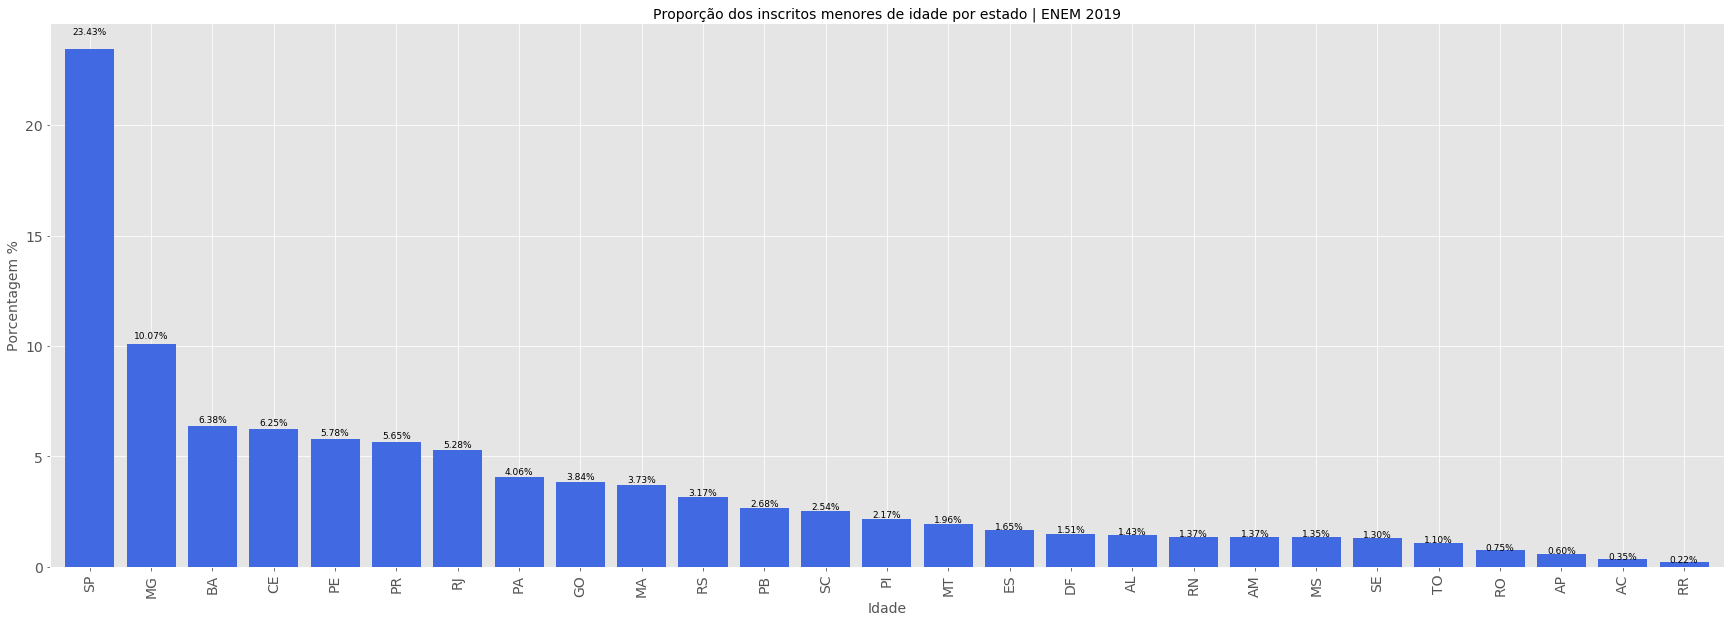

In [62]:

#using the style 
plt.style.use('ggplot') 
#my data plot and config

ax = estado.plot.bar(x = "(UF) - Estado", y = "Porcentagem % idade",
                    grid = True, stacked = True, width = 0.8,
                    color = "royalblue", figsize = (30,10), fontsize = 14, legend = False)

ax.set_xlabel('Idade', size = 14)
ax.set_ylabel('Porcentagem %', size = 14)
plt.title('Proporção dos inscritos menores de idade por estado | ENEM 2019', size = 14)

# Add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height/100), (x + width/2, y + height*1.03), ha='center', fontsize= 9)



# Desafio 3: Criar uma função para plotar o boxplot do seaborn

In [9]:
#ordenação da renda
uf = dados["SG_UF_RESIDENCIA"].value_counts().sort_values()
uf

RR      366
AC      946
AP     1047
TO     1178
RO     1400
MS     1655
SE     1815
MT     2230
AL     2263
DF     2408
ES     2550
SC     2673
AM     2820
RN     2959
PI     3034
PB     3690
GO     4268
PR     5259
RS     5466
MA     5543
PE     6941
PA     7170
CE     7381
RJ     8467
BA    10040
MG    13547
SP    20264
Name: SG_UF_RESIDENCIA, dtype: int64

In [10]:
#metodo que faz o plotBox
def plotBox(x, y, dados_analise, titulo):
    plt.figure(figsize=(20, 10))
    ax = sns.boxplot(x = x, y = y, data = dados_analise)
    plt.title(titulo)


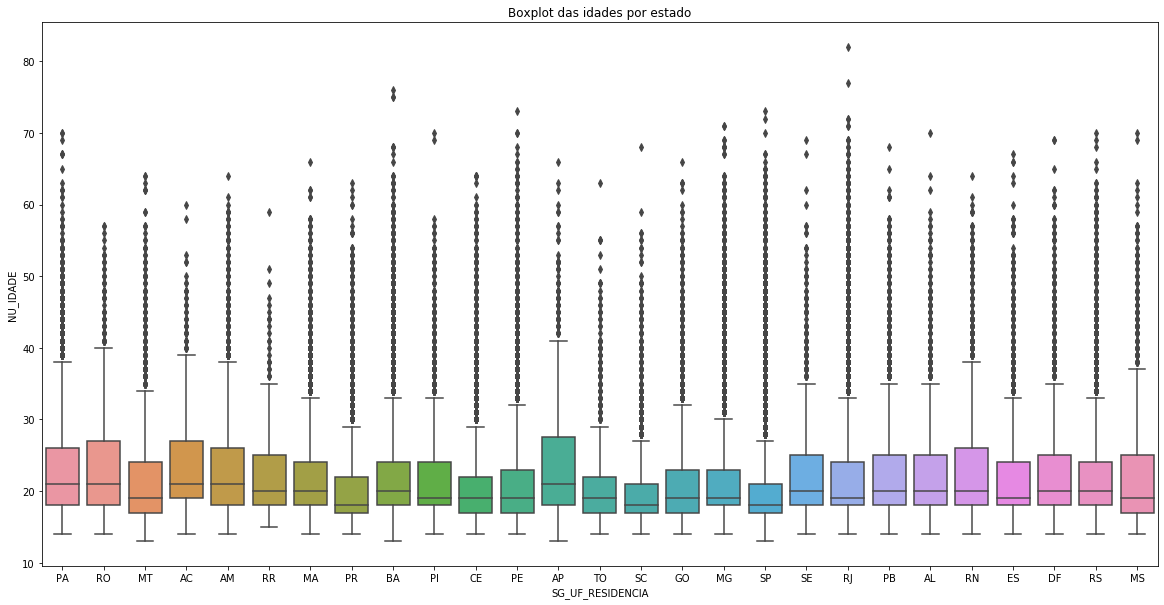

In [11]:
#passando valor para o metodo plotBox
plotBox(dados["SG_UF_RESIDENCIA"], dados["NU_IDADE"], dados,  "Boxplot das idades por estado")

# Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

In [65]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5
